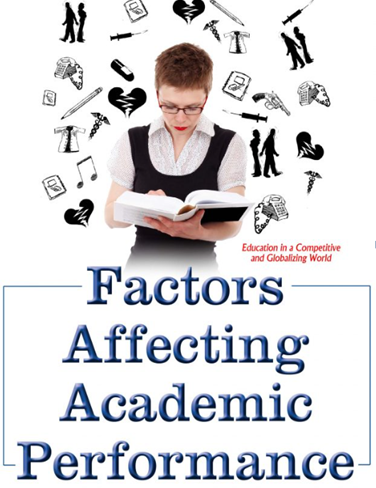

# <center>Exploring the determinants of Student's Academic Performance in the Program for International Student Assessment (PISA)</center>

## <center>By</center>

## <center>Ogunlana A. Adejoke</center>

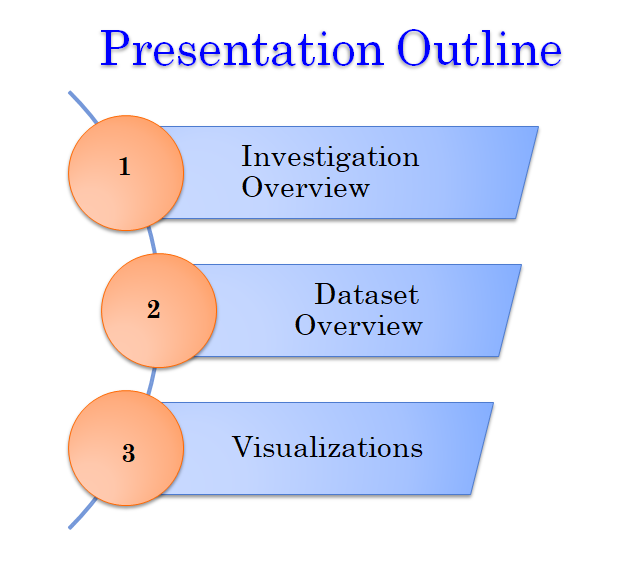

## Investigation Overview

In this presentation, focus is primarily on the factors that affect the academic performance of students in the PISA dataset. 
 


## Dataset Overview

- The Program for International Student Assessment (PISA) is the dataset investigated and it is a survey of students' skills and knowledge as they approach the end of compulsory education. 
- It is not a conventional school test that focuses on examining how well students have learnt the school curriculum; rather, it is an international assessment that tests how well students are prepared for life beyond school.
- About 5233 students in 2 economies, all Non-OECD member countries, took part in the PISA assessment of reading, mathematics and science literacy. 
- The dataset which was gathered from Udacity hosted website consist of 636 variables/features describing each student’s background, personality and academic performance. 
- Some of the variables were repeated and some were condensed so effort was made to select the features/variables necessary for the analysis. 

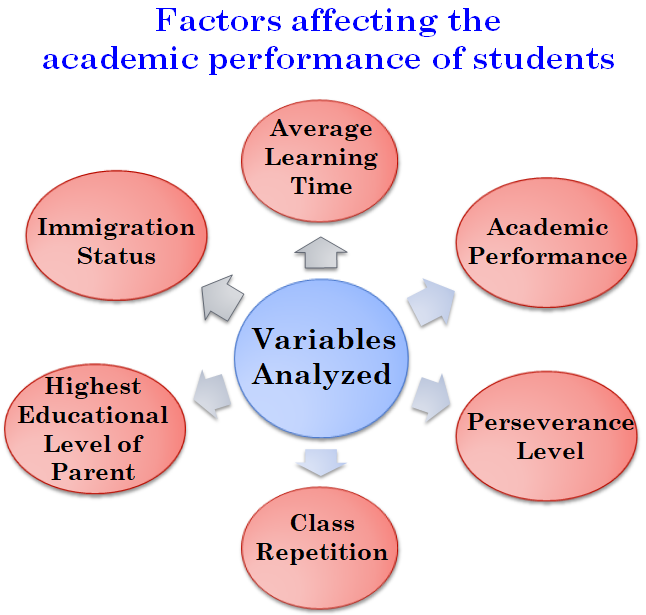

In [83]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [84]:
# load in the dataset into a pandas dataframe
# Loading the csv file to a dataframe
df_pisa_clean = pd.read_csv('df_pisa_clean.csv')

# There is tendency to get another unnamed column index 0 when reading the "twitter_archive_master.csv" file.
# Drop this unnamed column index using the code below.
df_pisa_clean.drop('Unnamed: 0',axis=1, inplace=True)

In [85]:
# convert the ordinal categorical variables into ordered categorical types

ordinal_var_dict = {'Class_repetition': ['Did not repeat a grade', 'Repeated a grade'],
                    'Immigration_status': ['Native', 'First-Generation', 'Second-Generation'],
                    'Perseverance_Give_up_easily': ['Not at all like me','Not much like me','Somewhat like me',
                                                    'Mostly like me', 'Very much like me'],
                    'Teacher_support': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Math_interest': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'School_does_little_to_prepare_me_for_life': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Class_management_teacher_keep_class_orderly': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Class_management_teacher_starts_on_time': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation_teachers_are_interested': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation_teachers_listen_to_students': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation_teachers_help_students': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Teacher_support_help_when_needed': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Teacher_support_help_learn': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Teacher_did_not_explain_well': ['Very likely', 'Likely', 'Slightly likely', 'Not at all likely'],
                    'Teacher_did_not_get_students_interested': ['Very likely', 'Likely', 'Slightly likely', 'Not at all likely'],
                    'Highest_educational_level_parents': ['ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, 4','ISCED 5B', 
                                                          'ISCED 5A, 6']}
                    
for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df_pisa_clean[var] = df_pisa_clean[var].astype(ordered_var)
    else: # pre-v0.21
        df_pisa_clean[var] = df_pisa_clean[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

- Class repetition(Grade repetition) involves the practice of holding back students who had failed to master the curriculum or meet the promotion criteria from reaching the next grade.


- Academic Peformance as a variable in this dataset is the average student's assessment in mathematics literacy, science literacy and reading literacy.

## Visualization 1: Distribution of Student's Academic Performance

Academic performance is the measurement of student achievement across various academic subjects.

> - Academic performance in this dataset is the average of all academic subject assessment score. Therefore, it is an engineered variable.

> - The plot of the Academic performance showed that it is normally distributed although with stepwise modal peaks. The highest peak is between 420 and 440. In the subsequent exploration, the Academic performance will serve as the major dependent variable employed for further visualization.

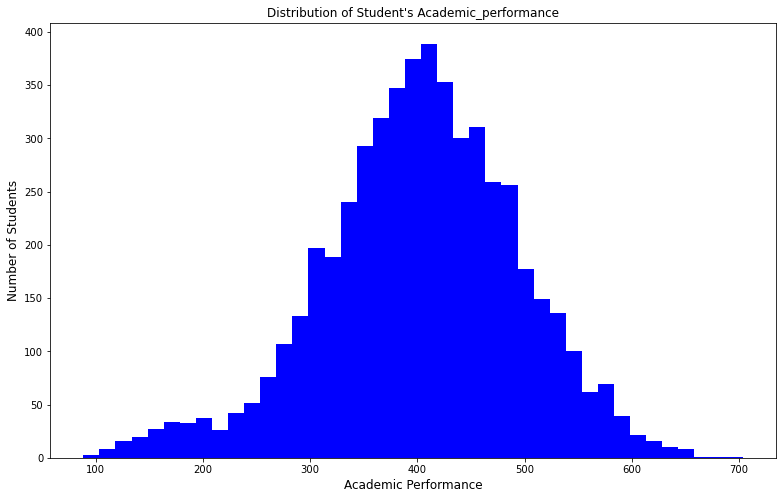

In [86]:
bins = np.arange(df_pisa_clean['Academic_performance'].min(), df_pisa_clean['Academic_performance'].max()+10, 15)

plt.figure(figsize=[13,8])
plt.hist(data= df_pisa_clean, x= 'Academic_performance', color = 'blue', bins=bins);
plt.xlabel('Academic Performance', fontsize = 12)
plt.ylabel('Number of Students',fontsize = 12)
plt.title("Distribution of Student's Academic_performance")   
plt.show()

## Visualization 2: Distribution of Student's Average Learning Time

Average learning time which is also an engineered variable is the average time in mins/week for a student to learn.

> - The plot of the student's average learning time depicts that the distribution is skewed to the right.

> - Moreso, bimodal peaks is evident in the plot with the first peak being between **120-130mins** and the second, between **170-180mins**.

In [87]:
cols = ['Average_learning_time'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df_pisa_clean[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df_pisa_clean[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df_pisa_clean[cols] < (Q1 - 1.5 * IQR)) | (df_pisa_clean[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df_pisa_clean = df_pisa_clean[condition]

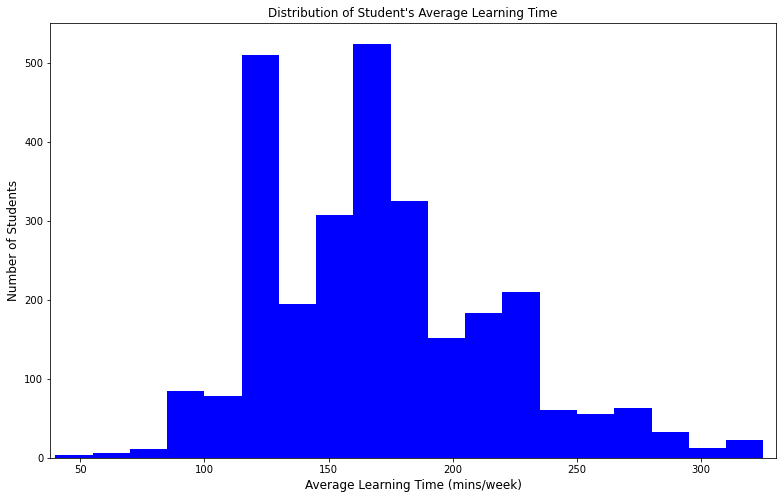

In [88]:
plt.figure(figsize=(13,8))
bins = np.arange(df_pisa_clean['Average_learning_time'].min(), df_pisa_clean['Average_learning_time'].max()+10, 15)
plt.hist(data= df_pisa_clean, x= 'Average_learning_time', color = 'blue', bins=bins);
plt.xlabel('Average Learning Time (mins/week)', fontsize = 12)
plt.ylabel('Number of Students',fontsize = 12)
plt.title("Distribution of Student's Average Learning Time");
plt.xlim(38,330);

## Visualization 4: Relationship between Perseverance level to give up easily and Student's Academic performance

- It is said that the quality of perseverance is crucial for success in every field of life and students with high levels of perseverance and grit have the highest GPAs and best attendance, and are more likely to be accepted to the most prestigious schools. 
> - In this dataset, it is evident from the barplots that students who are NOT MUCH LIKELY to give up easily performed BETTER academically than those that tend to give up easily. 

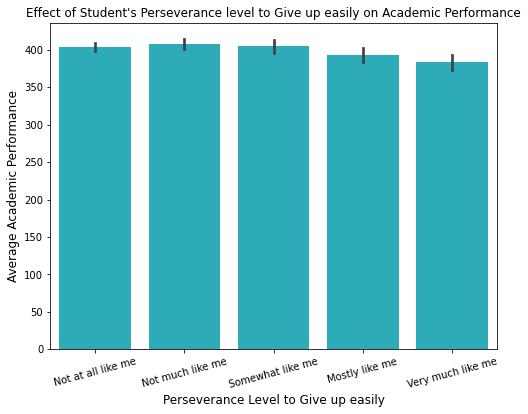

In [89]:
base_color =sb.color_palette()[9]
plt.figure(figsize=[8,6])
sb.barplot(data=df_pisa_clean, x='Perseverance_Give_up_easily', y='Academic_performance', color=base_color)
plt.xlabel('Perseverance Level to Give up easily', fontsize = 12)
plt.ylabel("Average Academic Performance", fontsize = 12)
plt.title("Effect of Student's Perseverance level to Give up easily on Academic Performance")
plt.xticks(rotation=15);

## Visualization 5: Relationship between Class Repetition and Student's Average Learning Time
> - In the plot showing the relationship between the Class repetition and the average learning time, the wider width of the "DID NOT REPEAT" category showed that students who **DID NOT REPEAT** a grade are **MORE THAN** those that **REPEATED**. 

> - As expected, students who **REPEATED** a grade are likely to spend **MORE TIME learning** than those that **DID NOT repeat a grade**.

> - The reason for this could be because those who repeated a grade are a grade behind and so will need to spent more time studying to make up for their studies than those that did not repeat a grade.

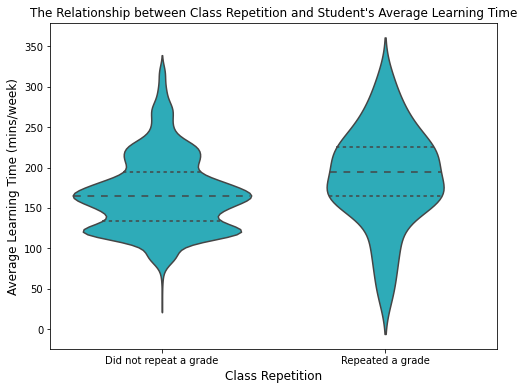

In [90]:
plt.figure(figsize=[8,6])
sb.violinplot(data=df_pisa_clean, x='Class_repetition', y='Average_learning_time', color=base_color, inner ='quartile')
plt.xlabel("Class Repetition", fontsize = 12)
plt.ylabel("Average Learning Time (mins/week)", fontsize = 12)
plt.title("The Relationship between Class Repetition and Student's Average Learning Time");

## Visualization 6: Effect of Student's Immigration Status and Class Repetition on Student's Academic Performance
- The plot showed that the **NATIVE STUDENTS who repeated a grade and those that did not repeat a grade performed in the same manner academically** as there is no significant difference in the two scores of these category. 

- For the IMMIGRANT STUDENTS, **those who did not repeat a grade** performed **better** academically than those **immigrant students that repeated a grade** irrespective of whether they are **first-, or second-generation immigrants**. 

- It can also be noticed that the **IMMIGRANT STUDENTS that repeated a grade** performed **better academically** than the **NATIVE STUDENTS** irrespective of whether the native students repeated a grade or not. 

- It can then be validated that alot is required of the immigrant students to perform better academically than the native students who are in their comfort zone. Thus, immigration status and Class repetition are factors that influence the academic performance of students.

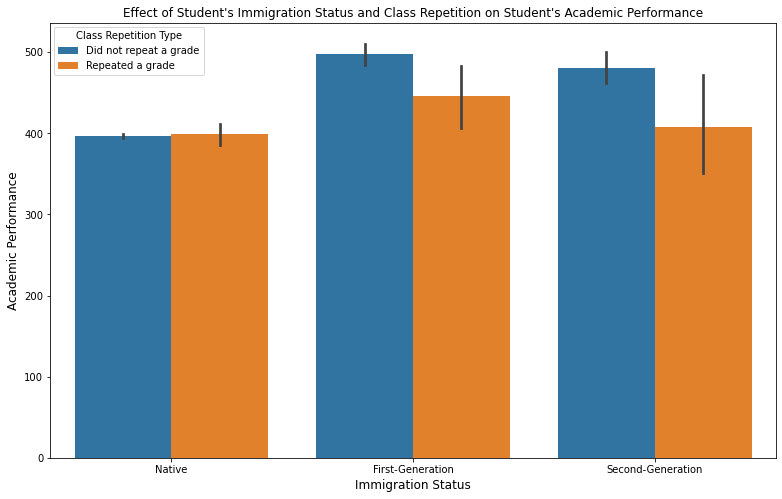

In [91]:
plt.figure(figsize=(13,8))
ax = sb.barplot(data = df_pisa_clean, x = 'Immigration_status', y = 'Academic_performance', hue = 'Class_repetition')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Class_repetition');
plt.xlabel('Immigration Status', fontsize =12)
plt.ylabel('Academic Performance', fontsize =12)
plt.legend(title= 'Class Repetition Type', loc='upper left', borderaxespad=0.4);
plt.title("Effect of Student's Immigration Status and Class Repetition on Student's Academic Performance", fontsize =12);
plt.show()

## Visualization 7: Effect of Class Repetition and Perseverance level to Give up easily on Student's Academic Performance

The plot to address the effect of class repetition and student's perseverance level to give up easily on their academic studies reveal that:
> - Whether students REPEATED a grade or NOT, students that are NOT MUCH likely to give up easily performed the best academically while those that are VERY MUCH LIKELY to give up easily are low-performing students.

> - Across all students, students who REPEATED a grade AND are NOT MUCH LIKELY to give up easily scored higher than other students in their academic studies, irrespective of whether the other students repeated a grade or not.

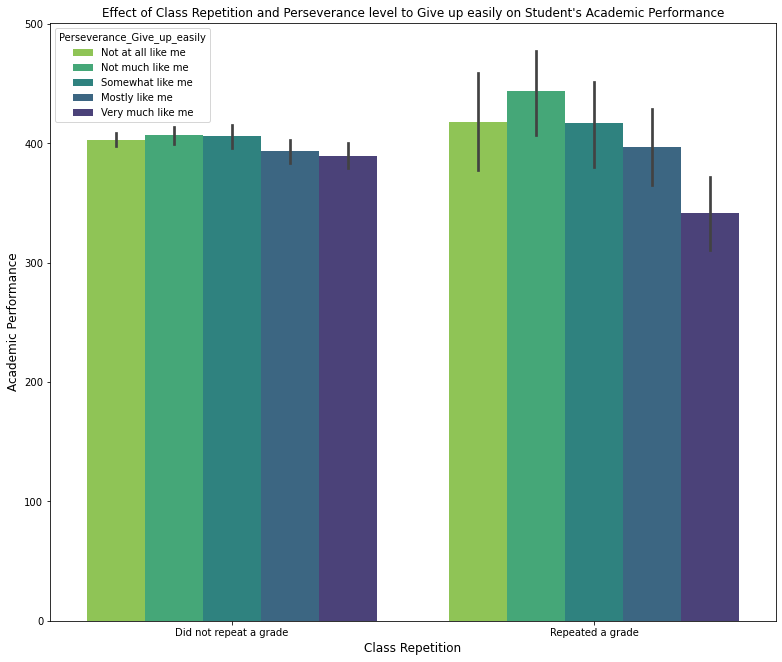

In [92]:
plt.figure(figsize=(13,11))
ax = sb.barplot(data = df_pisa_clean, x = "Class_repetition", y = "Academic_performance", 
                hue = "Perseverance_Give_up_easily", palette='viridis_r')
plt.xlabel("Class Repetition", fontsize = 12)
plt.ylabel("Academic Performance", fontsize = 12)
plt.title("Effect of Class Repetition and Perseverance level to Give up easily on Student's Academic Performance");

## Visualization 8: Effect of Class Repetition and Parent's Highest Level of Education on Student's Academic Performance
It is expected that students whose parent's highest level of education is ISCED 5A,6 and  did not repeat a grade would perform the best academically and those whose parent's level of education is ISCED 1 and repeated a grade would perform woefully. 
- As predicted, among students that DID NOT REPEAT a grade, students of parents with the highest level of education performed the best in their academic studies while students of parents with the lowest level of education had the lowest score.
- An interesting finding was observed among students that REPEATED a grade; students whose parent's highest level of education is ISCED 3B,C and repeated a grade perform the best academically, while students with parent's highest level of education being ISCED 5A,6 had the lowest score; lower than students of parent with ISCED 1.
- To sum up, irrespective of whether the students repeated a grade or not, students whose parent's highest level of education is ISCED 3B,C and repeated a grade perform the best academically and students with parent's highest level of education being ISCED 5A,6 had the lowest score.
- Other factors such as parent's occupational status and pressure on students might be responsible for students with parent's educational level of ISCED 5A,6 having the lowest score.
- The reason for students whose parent's highest level of education is ISCED 3B,C and repeated a grade, performing the best academically, is not far-fetched. It is likely that these set of students got extra parental support to perform better academically since they repeated a grade already.

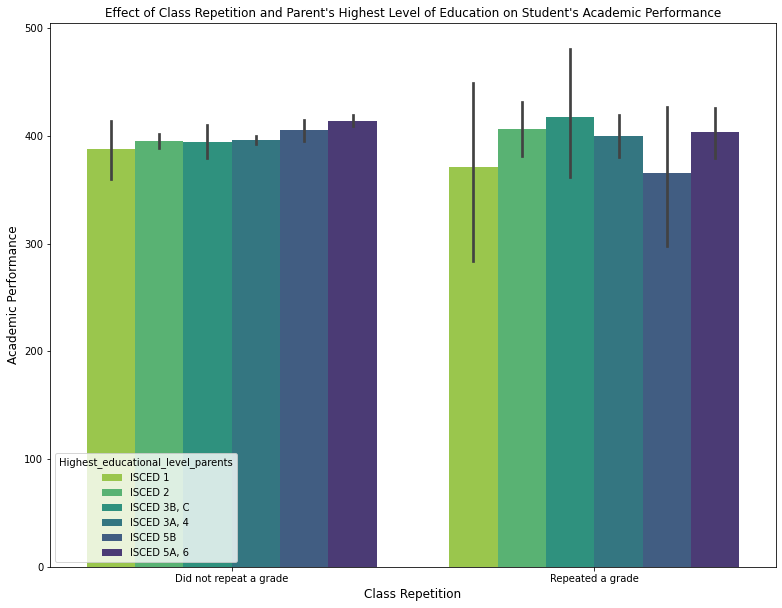

In [93]:
plt.figure(figsize=(13,10))
ax = sb.barplot(data = df_pisa_clean, x = "Class_repetition", y = "Academic_performance", 
                hue = "Highest_educational_level_parents", palette='viridis_r')
plt.setp(ax.axes, xlabel= "Class_repetition", ylabel= "Academic_performance");
plt.xlabel("Class Repetition", fontsize = 12)
plt.ylabel("Academic Performance", fontsize = 12)
plt.title("Effect of Class Repetition and Parent's Highest Level of Education on Student's Academic Performance");

## Visualization 9: Effect of Class Repetition and Average Learning Time on Student's Academic Performance

- Students who DO NOT repeat a grade AND spent ABOVE 150 mins/week perform BETTER academically than those who DID NOT repeat a grade and spent LESSER time learning.
- students who repeated a grade and spent more than 150 mins/week to catch up with their studies performed better academically than those who repeated a grade and spent lesser time learning. 
> - This suggests that there is hope for students to perform better academically if they spent more time learning eventhough they repeated a grade. Repeating a grade should not be a barrier to performing well academically only if such students can spend more time learning.
- Whether a student repeated a grade or not, spending more time learning will boost a student's academic performance and increase the student's chance of succeeding in the outside world.
Therefore, we can conclude that there is a positive relationship between student's grade repetition and average learning time for successful academic performance.

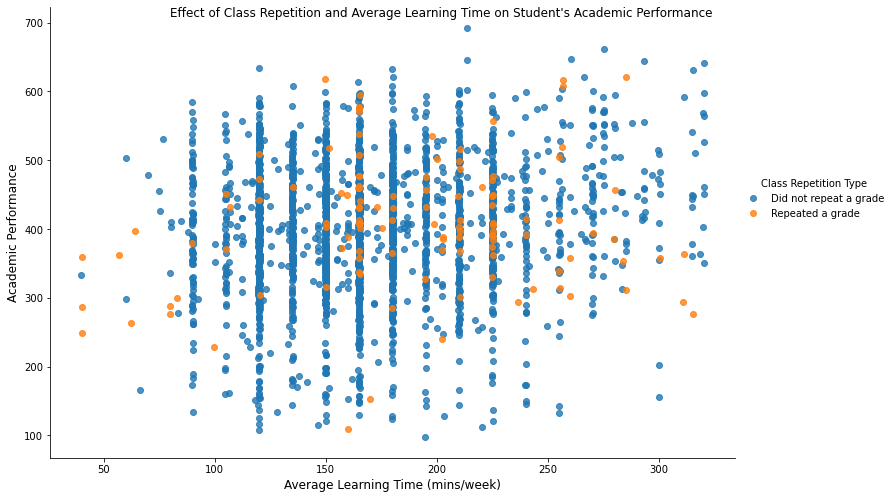

In [94]:
g=sb.FacetGrid(data= df_pisa_clean, hue = "Class_repetition", height = 7, aspect=1.5)
g.map(sb.regplot,"Average_learning_time",  "Academic_performance", x_jitter =0.3, scatter_kws = {'alpha' : 0.8}, fit_reg=False)
g.add_legend(title ='Class Repetition Type',  bbox_to_anchor=(1.0, 0.6))
plt.xlabel("Average Learning Time (mins/week)", fontsize = 12)
plt.ylabel("Academic Performance", fontsize = 12)
g.fig.suptitle("Effect of Class Repetition and Average Learning Time on Student's Academic Performance");

## Visualization 10: Effect of Immigration Status and Average Learning Time on Student's Academic Performance
- The plot showed that Immigrant students spent more time learning than native students. 
- Most of the immigrant students spent more than 180mins/week learning and hence, better academic performance. 
> - The zeal to learn for longer hours and to achieve better academic performance by the immigrants could be due to the greater expectation required of them to prove themselves as immigrant in a country since most immigrants are at disadvantaged compared to the natives, in a foreign country.
- All students (irrespective of their immigration status) who spent time above 170mins/week learning perform better academically than those who spent less than 170mins/week learning.

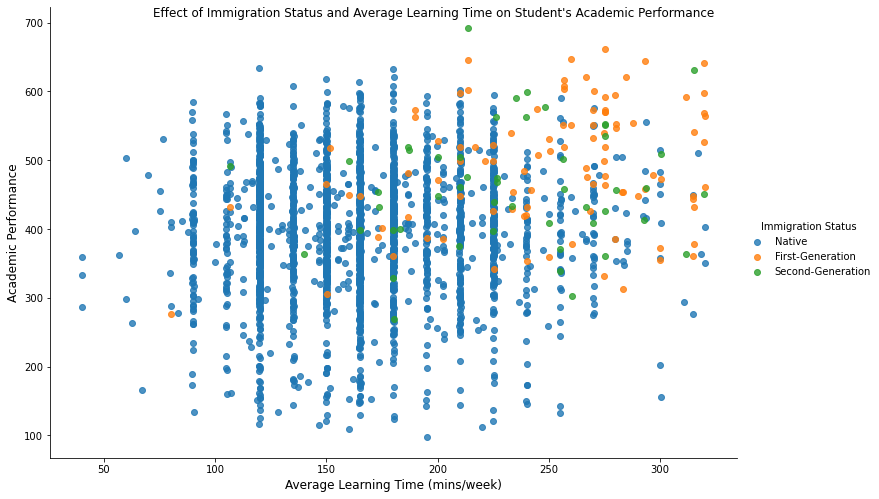

In [95]:
g=sb.FacetGrid(data= df_pisa_clean, hue = "Immigration_status", height = 7, aspect=1.5)
g.map(sb.regplot,"Average_learning_time",  "Academic_performance", x_jitter =0.3, scatter_kws = {'alpha' : 0.8}, fit_reg=False)
g.add_legend(title ='Immigration Status')
plt.xlabel("Average Learning Time (mins/week)", fontsize = 12)
plt.ylabel("Academic Performance", fontsize = 12)
g.fig.suptitle("Effect of Immigration Status and Average Learning Time on Student's Academic Performance");

In [96]:
!jupyter nbconvert PISA_Project_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook PISA_Project_Part2.ipynb to slides
[NbConvertApp] Writing 1575498 bytes to PISA_Project_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\OLALEKAN\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\OLALEKAN\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\OLALEKAN\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\OLALEKAN\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\OLALEKAN\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_fi